# Data Information
Source - https://www.kaggle.com/datasets/wenruliu/adult-income-dataset


## Author: Matt S.

## Project Overview:

Description:
Analysis and predicion of an individual's income based on several features, including but not limited to sex, race, martial status, and location.

- The target will be `income`. The remaining features will be used to calculate a person's expected income.

- A row represents a single person and the factors that determine the income.

Column information:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
class: >50K, <=50K

# Data Load & Inspection

In [10]:
import csv

## Numpy
import numpy as np
## Pandas
import pandas as pd
## MatPlotlib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

# Pandas options
pd.set_option('display.max_columns', 16)

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Read csv
# url = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week06/project2/adult.csv"
# df = pd.read_csv(url)

# Local path for when not working online
url = open(r"C:\Users\Foreground\Documents\GitHub\Prediction-of-Adult-Income\adult_dataset.csv")
df = pd.read_csv(url)

# Check df
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
# Check shape
df.shape

(48842, 15)

In [13]:
# Get overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- There are 48,842 rows
- 6 int columns
- 9 object columns
- No null values, but that doesn't mean that data isn't set to missing or similar.


In [14]:
# See what type of values are within the target
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [15]:
df['fnlwgt'].head()

0    226802
1     89814
2    336951
3    160323
4    103497
Name: fnlwgt, dtype: int64

Because there are only two types of values within income, a classification model will need to be used.

In [16]:
# Confirm for null values
df.isna().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    0
Length: 48842, dtype: int64

All but one of the columns are self-explantory as to what type of dtype the data/column should be, as well as its purpose/definition.

fnlwgt is the one that stands out that may be troublesome, as it is an integer that doesn't show any direct meaning. This may negatively affect the final model as it may not be needed.

Research online shows that fnlwgt refers to 'final weight.':
- "The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents."
Citaion - https://cseweb.ucsd.edu//classes/sp15/cse190-c/reports/sp15/048.pdf

# Data Cleaning

## Check for duplicates

In [17]:
# Check for duplicates
df.duplicated().sum()

52

There are 52 duplicates that need to be addressed.

In [18]:
sorted_duplicates = df[df.duplicated()].sort_values(by=list(df.columns))
sorted_duplicates


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
40948,17,Private,153021,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
26375,19,?,167428,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
34979,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
37599,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
38530,19,Private,139466,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K
37771,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
48274,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
30971,19,Private,318822,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


Note - because this dataset is effectively a census, it would not be far-fetched for people to have the features influcencing their income.

For example, 10 people grow up in the same town in the United States. They may have gone to the same school, gotten similar if not the same level of education, be of the same race.
- Everyone has a martial status
- Everyone has a level of education

It may not be required to deal with the duplicates, because there are only 52. Additionally, there aren't any columns which would make for a good sorting value/index. The data is heavily anonymized.

For now, the duplicates will not be touched.

## Check for missing values



### Missing categorical values

In [19]:
def list_categorical_value_types(df):
    categorical_columns = df.select_dtypes(include='object').columns

    for column in categorical_columns:
        unique_values = df[column].unique()
        print(f"Column: {column}")
        for value in unique_values:
            print(value)

        print()


In [20]:
list_categorical_value_types(df)

Column: workclass
Private
Local-gov
?
Self-emp-not-inc
Federal-gov
State-gov
Self-emp-inc
Without-pay
Never-worked

Column: education
11th
HS-grad
Assoc-acdm
Some-college
10th
Prof-school
7th-8th
Bachelors
Masters
Doctorate
5th-6th
Assoc-voc
9th
12th
1st-4th
Preschool

Column: marital-status
Never-married
Married-civ-spouse
Widowed
Divorced
Separated
Married-spouse-absent
Married-AF-spouse

Column: occupation
Machine-op-inspct
Farming-fishing
Protective-serv
?
Other-service
Prof-specialty
Craft-repair
Adm-clerical
Exec-managerial
Tech-support
Sales
Priv-house-serv
Transport-moving
Handlers-cleaners
Armed-Forces

Column: relationship
Own-child
Husband
Not-in-family
Unmarried
Wife
Other-relative

Column: race
Black
White
Asian-Pac-Islander
Other
Amer-Indian-Eskimo

Column: gender
Male
Female

Column: native-country
United-States
?
Peru
Guatemala
Mexico
Dominican-Republic
Ireland
Germany
Philippines
Thailand
Haiti
El-Salvador
Puerto-Rico
Vietnam
South
Columbia
Japan
India
Cambodia
Poland


Multiple columns use '?' to signify missing data. This will be updated to be a bit more visible for future EDA and scaling as well.

In [21]:
# Replace '?' with 'Missing'
categorical_columns = df.select_dtypes(include='object').columns

for column in categorical_columns:
    df[column] = df[column].replace('?', 'Missing')

In [22]:
# Confirm that ? has been updated
for col in categorical_columns:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print("\n")

Value Counts for workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Missing              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


Value Counts for education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


Value Counts for marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


Value Coun

'?' is no longer within the categorical columns.

### Missing numerical values

In [23]:
def check_unique_numerical_values(df):
    numerical_columns = df.select_dtypes(include='number').columns

    for column in numerical_columns:
        value_counts = df[column].value_counts()
        missing_values = value_counts[value_counts.index.isnull() | value_counts.index.isin([0, -1])]

        if not missing_values.empty:
            print(f"Column: {column}")
            print(f"Missing or frequently occurring values:")
            print(missing_values)
            print()



In [24]:
check_unique_numerical_values(df)


Column: capital-gain
Missing or frequently occurring values:
0    44807
Name: capital-gain, dtype: int64

Column: capital-loss
Missing or frequently occurring values:
0    46560
Name: capital-loss, dtype: int64



It will be difficult to tell if some of the 0 values are legitmate or if they were used to fill NaNs.

The output above may help identify values that were originally NaNs.

# Check for inconsistent values

In [25]:
# Obtain the value counts for all string columns
for col in categorical_columns:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print("\n")

Value Counts for workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Missing              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


Value Counts for education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


Value Counts for marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


Value Coun

Values are consistent. No scenarios similar to F, Female, female, fem, etc.

Exploratory Data Analysis

## EDA

#### Functions

In [26]:
def explore_categorical(df, columns, fillna=True, placeholder='MISSING',
                        figsize=(6, 4), order=None):

    figs = []
    axs = []

    for x in columns:
        # Make a copy of the dataframe and fillna
        temp_df = df.copy()
        # Before filling nulls, save null value counts and percent for printing
        null_count = temp_df[x].isna().sum()
        null_perc = null_count / len(temp_df) * 100
        # fillna with placeholder
        if fillna:
            temp_df[x] = temp_df[x].fillna(placeholder)
        # Create figure with desired figsize
        fig, ax = plt.subplots(figsize=figsize)
        # Plotting a count plot
        sns.countplot(data=temp_df, x=x, ax=ax, order=order)
        # Rotate Tick Labels for long names
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        # Add a title with the feature name included
        ax.set_title(f"Column: {x}", fontweight='bold')

        # Fix layout and show plot (before print statements)
        fig.tight_layout()
        plt.show()

        # Append the figures and axes to lists
        figs.append(fig)
        axs.append(ax)

        # Print null value info
        print(f"- NaN's Found: {null_count} ({round(null_perc, 2)}%)")
        # Print cardinality info
        nunique = temp_df[x].nunique()
        print(f"- Unique Values: {nunique}")
        # First find value counts of feature
        val_counts = temp_df[x].value_counts(dropna=False)
        # Define the most common value
        most_common_val = val_counts.index[0]
        # Define the frequency of the most common value
        freq = val_counts.values[0]
        # Calculate the percentage of the most common value
        perc_most_common = freq / len(temp_df) * 100
        # Print the results
        print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common, 2)}%)")
        # Print message if quasi-constant or constant (most common val more than 98% of data)
        if perc_most_common > 98:
            print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
        else:
            print("- Not constant or quasi-constant.")

    return figs, axs


In [27]:
def plot_categorical_vs_target(df, x, y='income', figsize=(6, 4),
                               fillna=True, placeholder='MISSING',
                               order=None):
    # Make a copy of the dataframe and fillna
    temp_df = df.copy()
    # fillna with placeholder
    if fillna:
        temp_df[x] = temp_df[x].fillna(placeholder)
    # or drop nulls prevent unwanted 'nan' group in stripplot
    else:
        temp_df = temp_df.dropna(subset=[x])
    # Create the figure and subplots
    fig, ax = plt.subplots(figsize=figsize)

    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)

    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3, zorder=0)
    # Rotate xlabels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add a title
    ax.set_title(f"{x} vs. {y}", fontweight='bold')
    fig.tight_layout()
    return fig, ax


### Exploratory Data Analysis

In [28]:
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

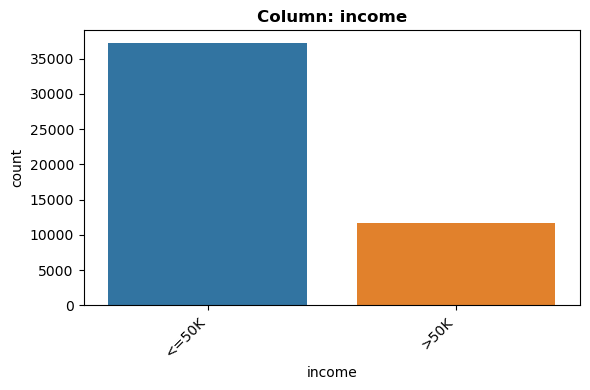

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '<=50K' occurs 37155 times (76.07%)
- Not constant or quasi-constant.


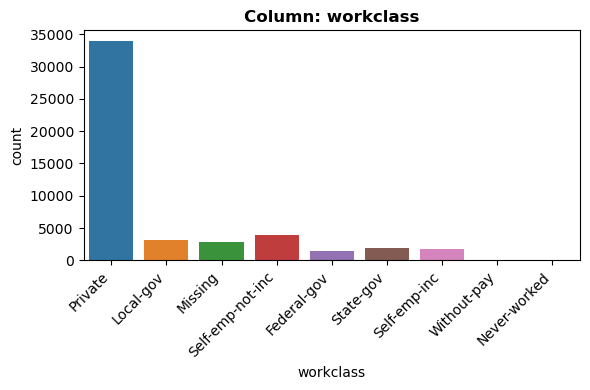

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: 'Private' occurs 33906 times (69.42%)
- Not constant or quasi-constant.


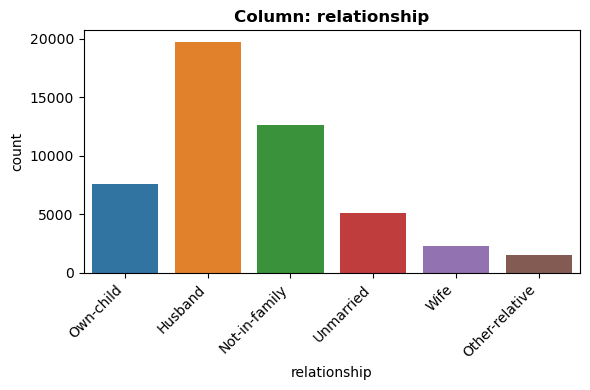

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: 'Husband' occurs 19716 times (40.37%)
- Not constant or quasi-constant.


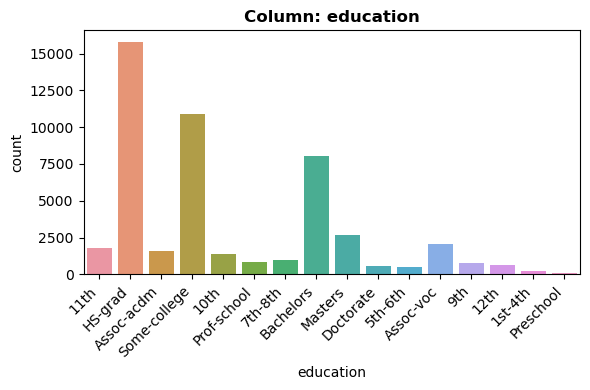

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'HS-grad' occurs 15784 times (32.32%)
- Not constant or quasi-constant.


In [29]:
figures, axes = explore_categorical(df, columns=['income', 'workclass', 'relationship', 'education'])


- High school grad is the most common level of education
- Bachelors is the most common college-level education

The majority of relationships consist of husband, meaning that the husbands in a family are usually the ones working.


- The top three age brackets are 30, 40, and ~53.
- Most people work 40 hours a week.
- The 2nd highest value for hours per week is 50 hours.

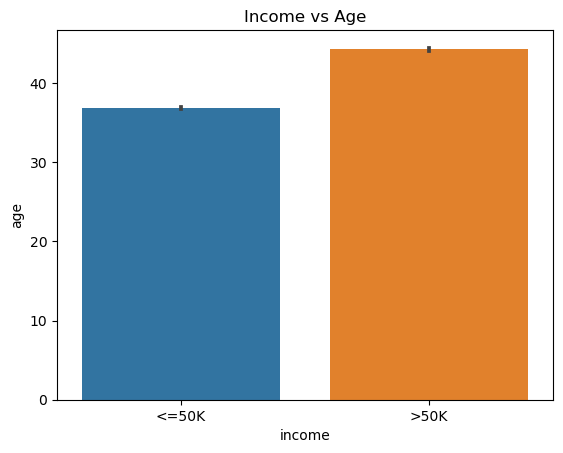

In [30]:
sns.barplot(data=df, x='income', y='age')

plt.xlabel('income')
plt.ylabel('age')
plt.title('Income vs Age')

plt.show()


People typically over 35 make more than 50k per year.

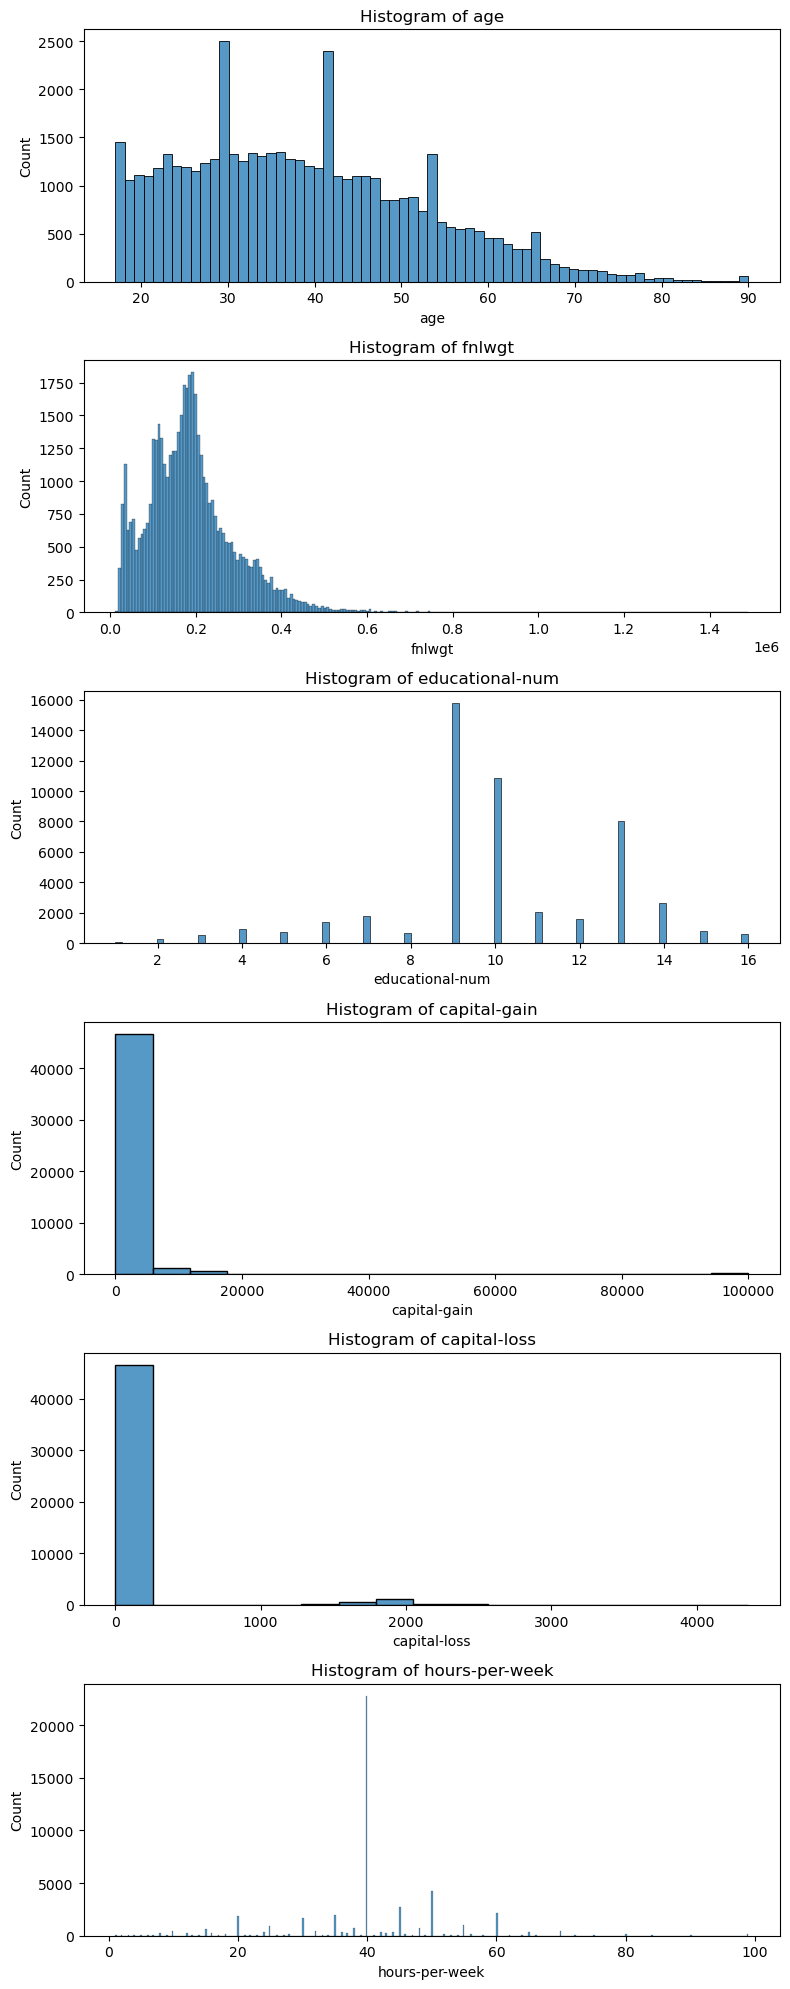

In [31]:
# Get numerical columns
numerical_columns = df.select_dtypes(include='number').columns

fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, 20))

# Generate a histogram of all numeric columns for easy comparision
for col, ax in zip(numerical_columns, axes):
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(f'Histogram of {col}')

# Use tight_layout for readability
plt.tight_layout()
plt.show()

In [32]:
# Check numerics for correlations
corr = df.corr()
corr

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [33]:
df['income'].dtype

dtype('O')

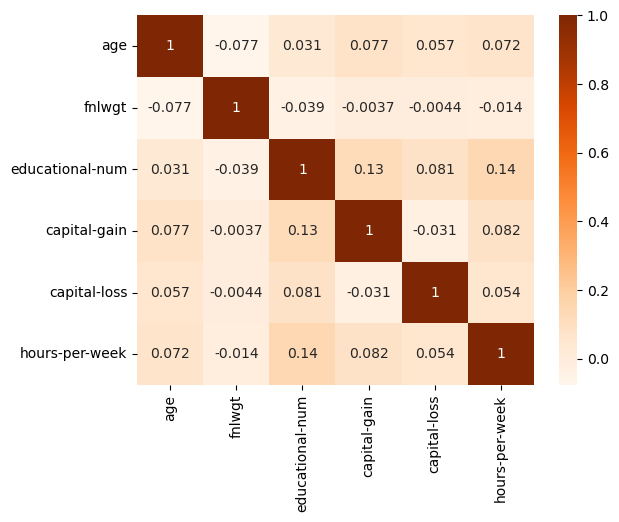

In [34]:
# Display heatmap
ax = sns.heatmap(corr, cmap='Oranges', annot=True)

**Issue with heatmap:**
The target consists of two values as a string, "<=50k" and ">50k". Heatmaps only handle numerics.

It may be possible to do a pairplot using income as a hue, but it will have to be analyzed differently.

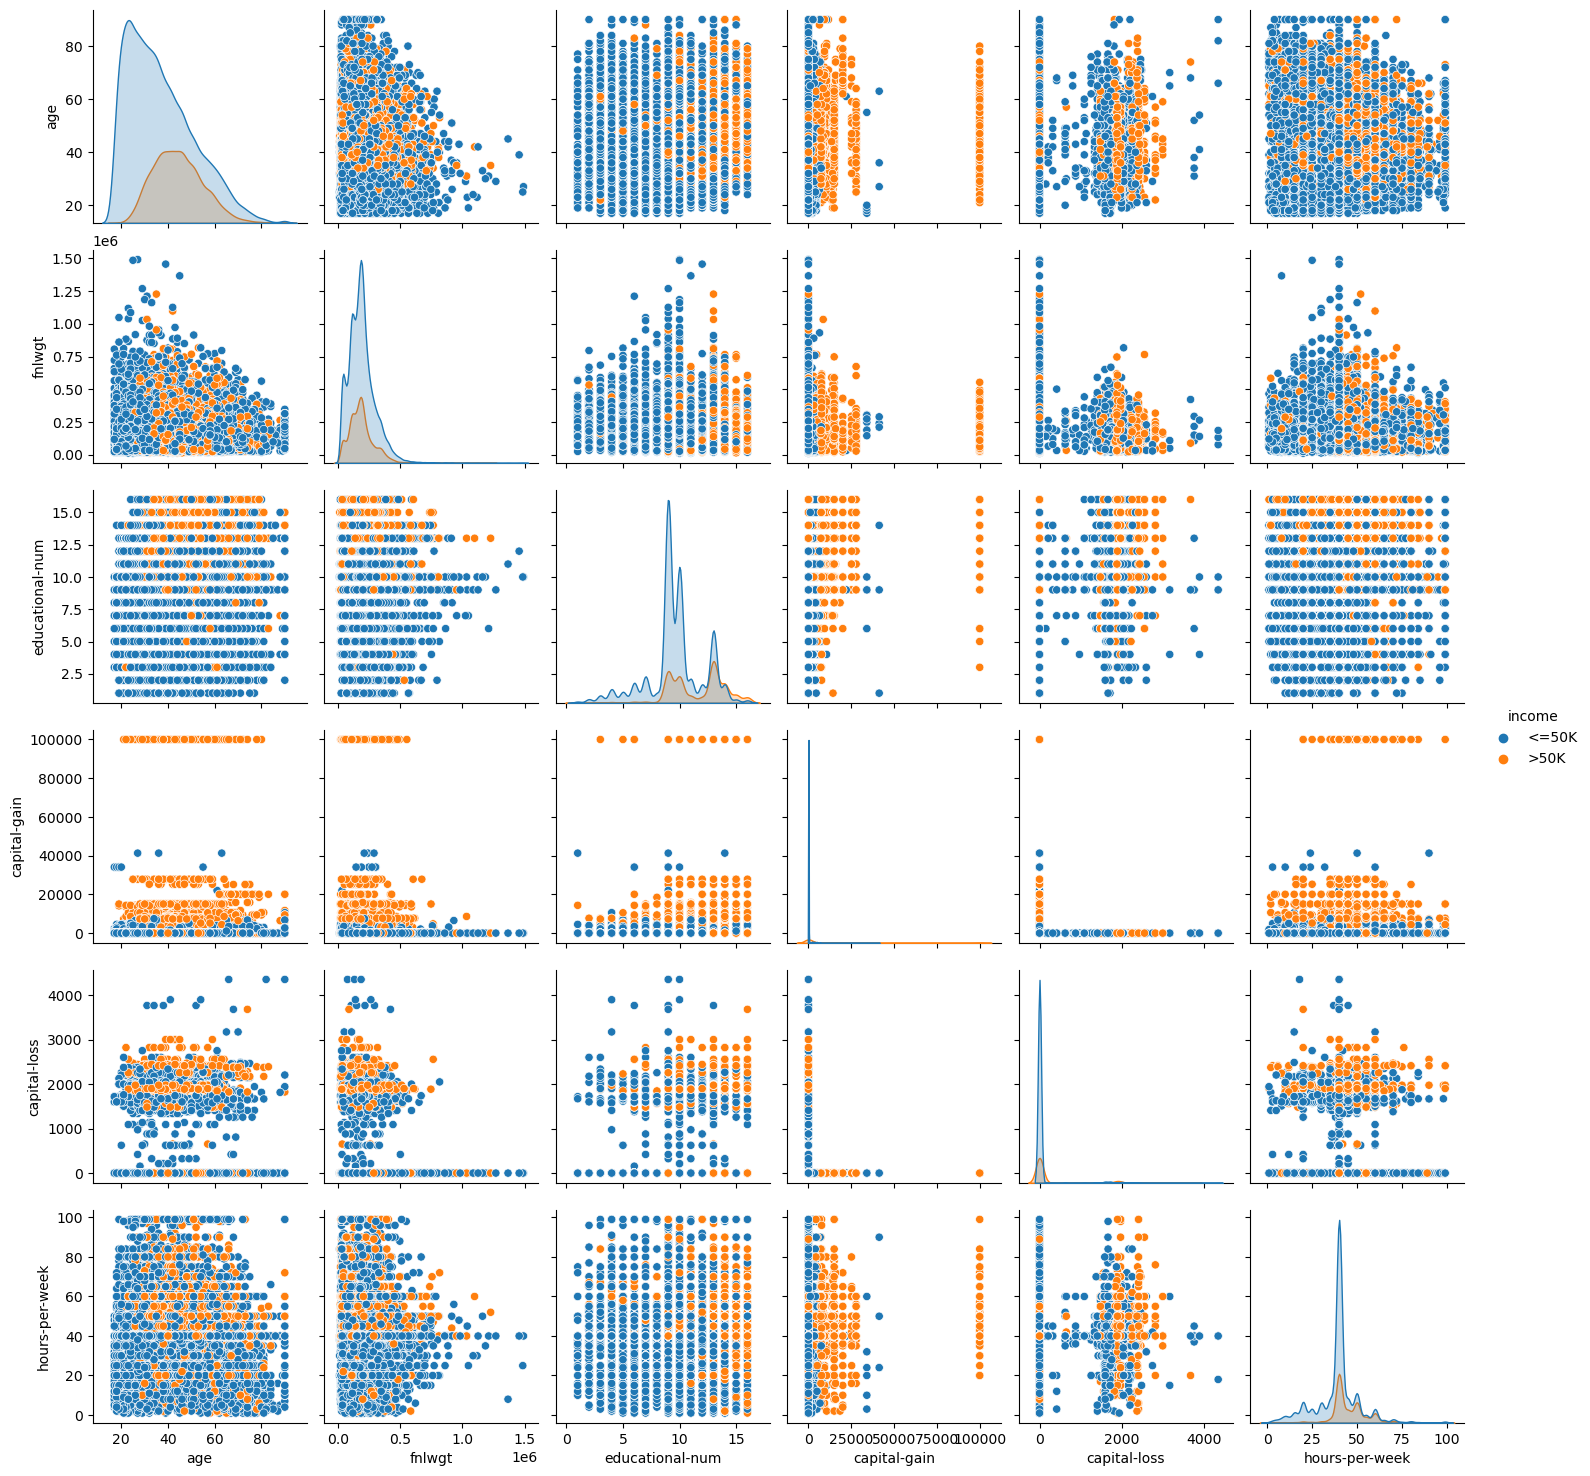

In [35]:
sns.pairplot(df, hue='income')

Age vs:
-
- Captial Loss: The most common capital loss across all age ranges where income is greater than 50k was approx. 2000 and 2500.
- Hours Per Week: People with an income of greater than 50k  and ages 40-60 typically work 40-60 hours per week.




# Modeling

In [36]:
# imports
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt


# Models
# gradient boosting
# logistic regression

# Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Classification analysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay


# Preprocessing
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

##  Functions

In [37]:
def eval_classification(true, pred, name, labels=None):
    """shows classification_report and confusion matrix
    for classification model predictions.  Outputs a dataframe of metrics"""

    print(name, '\n')
    print(classification_report(true, pred, target_names=labels))
    ConfusionMatrixDisplay.from_predictions(true, pred, display_labels=labels, )

    plt.show()

    scores = pd.DataFrame()
    scores['Model Name'] = [name]
    scores['Precision'] = [precision_score(true, pred)]
    scores['Recall'] = [recall_score(true, pred)]
    scores['F1 Score'] = [f1_score(true, pred)]
    scores['Accuracy'] = [accuracy_score(true, pred)]
    scores.set_index('Model Name', inplace=True)

In [38]:
from sklearn.base import TransformerMixin

class FrequencyEncoder(TransformerMixin):
    def fit(self, X, y=None):
        self.freq_encoding = {}
        for column in X.columns:
            self.freq_encoding[column] = dict(X[column].value_counts(normalize=True))
        return self

    def transform(self, X):
        X_encoded = X.copy()
        for column in X.columns:
            X_encoded[column] = X_encoded[column].map(self.freq_encoding[column])
        return X_encoded


## Model Preparation

In [39]:
# Set target
y = df['income']

# Set features
X = df.drop(columns='income')

In [40]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Preprocessing

In [41]:
# Instantiate the transformers
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [42]:
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_include='object')


In [43]:
## Create tuples
number_tuple = ('Numeric', scaler, num_cols)
cat_tuple = ('Nominal',ohe, cat_cols)

## Create the preprocessor using columntransformer
preprocessor = ColumnTransformer([number_tuple, cat_tuple],
                                       remainder='passthrough')

### Baseline model (DummyClassifier)

In [44]:
# Create an instance of the dummy classifier
dummy_clf = DummyClassifier(strategy='most_frequent')

# Create a model pipeline
dummy_pipeline = make_pipeline(preprocessor, dummy_clf)

# Fit the model
dummy_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numeric', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002DFBE47D400>),
                                                 ('Nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002DFC3F68880>)])),
                ('dummyclassifier', DummyClassifier(strategy='most_frequent'))])

In [45]:
dummy_prediction = dummy_clf.predict(X_test)

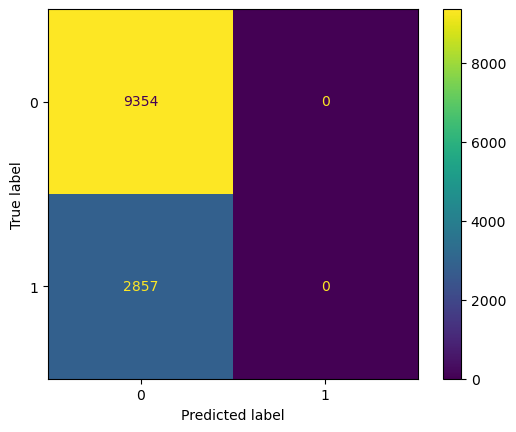

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for dummy classifier model
dummy_cm = confusion_matrix(y_test, dummy_prediction)

# Create ConfusionMatrixDisplay for dummy classifier model
dummy_cm_display = ConfusionMatrixDisplay(dummy_cm)

# Plot confusion matrix for dummy classifier model
dummy_cm_display.plot()

### Logistic Regression (Untuned)


In [47]:
# # Convert target to numerical values
# linreg_df = df.copy()
# linreg_df['income'] = linreg_df['income'].replace({'>50K':1, '<=50K':0})
# linreg_df.head()


In [48]:
# Make an instance of the model
logreg = LogisticRegression(C = 1000)

# Create pipeline
logreg_pipeline = make_pipeline(preprocessor, logreg)
logreg_pipeline


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numeric', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002DFBE47D400>),
                                                 ('Nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002DFC3F68880>)])),
                ('logisticregression', LogisticRegression(C=1000))])

In [49]:
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numeric', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002DFBE47D400>),
                                                 ('Nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002DFC3F68880>)])),
                ('logisticregression', LogisticRegression(C=1000))])

### Logistic Regression (tuned)

In [50]:
# Create the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)

# Combine the preprocessor and logistic regression model into a single pipeline
pipeline = make_pipeline(preprocessor, logreg_model)
pipeline


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numeric', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002DFBE47D400>),
                                                 ('Nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002DFC3F68880>)])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [51]:
# Define the hyperparameter grid for grid search
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'logisticregression__penalty': ['l1', 'l2']         # Penalty ('l1' for L1 regularization, 'l2' for L2 regularization)
}


In [52]:
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Numeric',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002DFBE47D400>),
                                                                        ('Nominal',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002DFC3F68880>)])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                         'logisticregression__penalty': ['l1', 'l2']},
             verbose=2)

In [53]:
# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      9354
        >50K       0.74      0.61      0.67      2857

    accuracy                           0.86     12211
   macro avg       0.81      0.77      0.79     12211
weighted avg       0.85      0.86      0.85     12211



### KNN Classifier (Untuned)

In [54]:
# Create an instance of the model
knn_clf = KNeighborsClassifier()

# Create a model pipeline
knn_pipeline = make_pipeline(preprocessor, knn_clf)

# Fit the model on the training data
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numeric', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002DFBE47D400>),
                                                 ('Nominal',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002DFC3F68880>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [55]:
# Make predictions on the test set
y_pred_untuned = knn_pipeline.predict(X_test)

# Evaluate the untuned KNN classifier's performance
accuracy_untuned = accuracy_score(y_test, y_pred_untuned)
print("Untuned KNN Classifier:")
print(f"Accuracy: {accuracy_untuned:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_untuned))


Untuned KNN Classifier:
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.90      9354
        >50K       0.67      0.61      0.64      2857

    accuracy                           0.84     12211
   macro avg       0.78      0.76      0.77     12211
weighted avg       0.83      0.84      0.84     12211



### KNN Classifier (Tuned)

In [63]:
%%time

# Define the hyperparameter grid for grid search
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],       # Number of neighbors to consider
    'kneighborsclassifier__weights': ['uniform', 'distance'],  # Weight function used in prediction
}

# Create the GridSearchCV object for KNN classifier
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search_knn.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 609 ms
Wall time: 1min 31s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder=PCA(n_components=0.95),
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002DFBC673D30>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002DFB707D760>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 7],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             verbose=2)

In [62]:
%%time
# Get the best KNN classifier with tuned hyperparameters
tuned_knn_classifier = grid_search_knn.best_estimator_

# Make predictions on the test set using the tuned KNN classifier
y_pred_tuned = tuned_knn_classifier.predict(X_test)

# Evaluate the tuned KNN classifier's performance
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned KNN Classifier:")
print(f"Accuracy: {accuracy_tuned:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned))


Tuned KNN Classifier:
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      9354
        >50K       0.64      0.60      0.62      2857

    accuracy                           0.83     12211
   macro avg       0.76      0.75      0.76     12211
weighted avg       0.82      0.83      0.83     12211

CPU times: total: 1min 23s
Wall time: 8.72 s


## Models with PCA

In [58]:
# Import PCA
from sklearn.decomposition import PCA

# Define the columns containing numerical and categorical features
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_include='object')


# Create the data preprocessing pipeline using StandardScaler for numerical features
# and OneHotEncoder for categorical features, followed by PCA with 95% retention.
preprocessor_with_pca = make_column_transformer(
    (StandardScaler(), num_cols),
    (OneHotEncoder(), cat_cols),
    remainder=PCA(n_components=0.95)  # Keep enough components to explain 95% variance
)


### Tuned Logistic Regression

In [59]:
# Create the logistic regression model
logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs')  # Specify the solver

# Combine the preprocessor and logistic regression model into a single pipeline
logreg_pipeline = make_pipeline(preprocessor, logreg_model)

# Define the hyperparameter grid for grid search
param_grid_logreg = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
}

# Create the GridSearchCV object for Logistic Regression
grid_search_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search_logreg.fit(X_train, y_train)

# Get the best Logistic Regression model with tuned hyperparameters
tuned_logreg_model = grid_search_logreg.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


### Tuned KNN Classifier

In [60]:
# Create the KNN classifier
knn_classifier = KNeighborsClassifier()

# Combine the preprocessor with PCA and KNN classifier into a single pipeline
knn_pipeline = make_pipeline(preprocessor_with_pca, knn_classifier)

# Define the hyperparameter grid for grid search
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
}

# Create the GridSearchCV object for KNN classifier
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search_knn.fit(X_train, y_train)

# Get the best KNN classifier with tuned hyperparameters
tuned_knn_classifier = grid_search_knn.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits


### Evaluation

In [61]:
# Make predictions on the test set using the tuned Logistic Regression model
y_pred_logreg = tuned_logreg_model.predict(X_test)

# Evaluate the tuned Logistic Regression model's performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Tuned Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_logreg:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Make predictions on the test set using the tuned KNN classifier
y_pred_knn = tuned_knn_classifier.predict(X_test)

# Evaluate the tuned KNN classifier's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("\nTuned KNN Classifier:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


Tuned Logistic Regression Classifier:
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      9354
        >50K       0.74      0.61      0.67      2857

    accuracy                           0.86     12211
   macro avg       0.81      0.77      0.79     12211
weighted avg       0.85      0.86      0.85     12211


Tuned KNN Classifier:
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      9354
        >50K       0.64      0.60      0.62      2857

    accuracy                           0.83     12211
   macro avg       0.76      0.75      0.76     12211
weighted avg       0.82      0.83      0.83     12211



Because the KNN tuned fitting is currently taking nearly 18 minutes, copying the evaluation output here to not need to run it again.
- KNN tuned fitting only takes ~18 minutes online. Running locally reduces time to under two minutes.

```
Tuned Logistic Regression Classifier:
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      9354
        >50K       0.74      0.61      0.67      2857

    accuracy                           0.86     12211
   macro avg       0.81      0.77      0.79     12211
weighted avg       0.85      0.86      0.85     12211


Tuned KNN Classifier:
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      9354
        >50K       0.64      0.60      0.62      2857

    accuracy                           0.83     12211
   macro avg       0.76      0.75      0.76     12211
weighted avg       0.82      0.83      0.83     12211
```

The tuned logistic regression (TLR) model has an accuracy of 0.86 wheras the KNN classifier has an accuracy of 0.83
- The TLR is more accurate

# To-Do

- Make readme
- Make more specific EDA graphs

- Continue Pairplot hue analysis.
  - Note: Pairplot broke
- EDA section has repeated code for plots. Move them into a function.

Look into FrequencyEncoder. Using OHE on 'native-country' feature will generate 30+ columns. Use OHE for now then improve on this later.